<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/4_Two-Dimensional%20Flows(NonLinear-Systems)/Lodka_Volterra_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema Lodka Volterra



Presa-Depredador

$$ \frac{dx}{dt}=\alpha x-\beta xy $$
$$ \frac{dy}{dt}=\delta xy - \gamma y $$

donde:

* $y$ es el número de algún predador (por ejemplo, un leones);
* $x$ es el número de sus presas (por ejemplo, cebras);
* $\frac{dy}{dt}$ y $\frac{dx}{dt}$ representa el crecimiento de las dos poblaciones en el tiempo;t representa el tiempo.

* $\alpha$: tasa de crecimiento de las presas.

* $\beta$: éxito en la caza del depredador.

* $\gamma$: tasa de decrecimiento de los depredadores.

* $\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.





In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

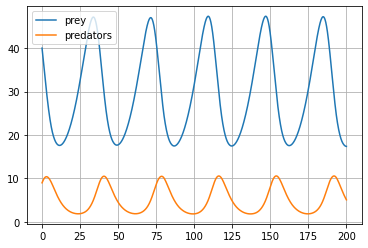

In [2]:
def LodkaVolterra (t,xy,alpha,beta,gamma,delta):
  x,y=xy
  return [alpha*x-beta*x*y, -gamma*y+delta*x*y]


a,b,c,d= 0.1, 0.02,0.3,0.01


t_in=0
t_fin=200
xy0=[40, 9]
tspam=[t_in,t_fin]
t=np.linspace(t_in,t_fin,100000)
sol=solve_ivp(LodkaVolterra,tspam,xy0,args=(a,b,c,d),t_eval=t)
plt.plot(sol.t, sol.y[0],label='prey')
plt.plot(sol.t, sol.y[1],label='predators')
#plt.axis([t_in,t_fin,0,15])
plt.legend()

#plt.axis([ti, tf, -10, 10])
plt.grid()

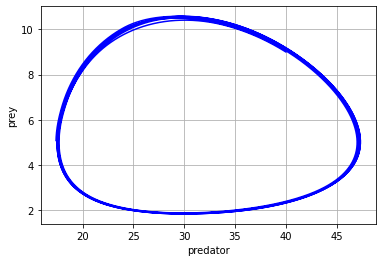

In [3]:
plt.plot(sol.y[0], sol.y[1],label='prey',color='blue')
plt.grid()
plt.ylabel('prey')
plt.xlabel('predator')
plt.show()



(24, 24)

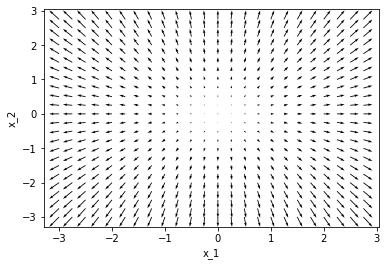

In [8]:
delta = 0.25 ;
x=np.arange(-3,3,delta)
x1,x2 = np.meshgrid(x,x )
f = x1**2 + x2**2 
[fx1 ,fx2 ] = np.gradient( f , delta , delta ) ;
#plt.contour ( x1 , x2 , f ) 
plt.xlabel ( 'x_1' ) 
plt.ylabel ( 'x_2' )
plt.quiver (x2,x1, fx1 , fx2 )

fx1.shape

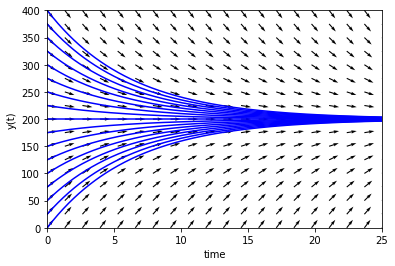

In [18]:
from scipy.integrate import odeint


def modelo2(y, t):
    dydt = 32 - 0.16 * y
    return dydt

t0, tf, h = 0, 25, 0.1
t = np.arange(t0, tf+h, h)
ymin, ymax, ystep = 0, 400, 25
y = np.arange(ymin, ymax+ystep, ystep)

for y0 in y:
    line = odeint(modelo2, y0, t)
    plt.plot(t, line, 'b')

x = np.linspace(t0, tf, 20)
X, Y = np.meshgrid(x, y)

U = 1
V = modelo2(Y, None)
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

plt.quiver(X, Y, U, V, angles='xy')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.axis([t0, tf, ymin, ymax])
plt.show()

[]
